## Clasificación CIFAR

In [5]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#### Muestra de imágenes

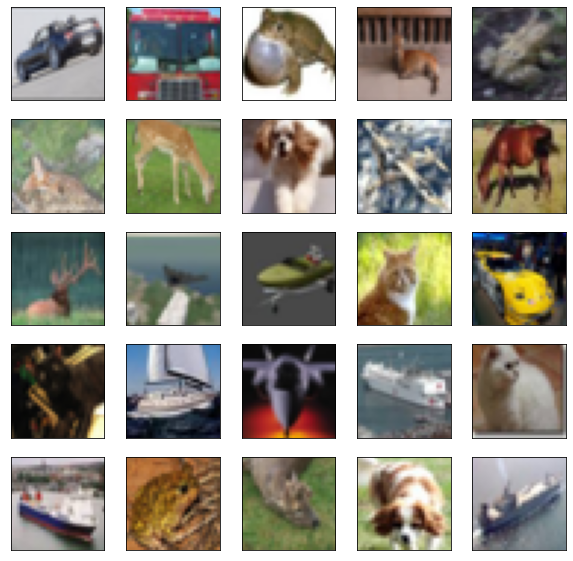

In [6]:
plt.figure(figsize = (10 , 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, x_train.shape[0])
  plt.imshow(x_train[img_index], cmap = "gray_r")

#### Construcción del clasificador 

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test =  tf.keras.utils.to_categorical(y_test)

In [8]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
x_train = x_train.reshape(50000, x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
x_test = x_test.reshape(10000, x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

In [10]:
x_train = (x_train - x_train.mean(axis=0))/x_train.std(axis=0)
x_test = (x_test - x_test.mean(axis=0))/x_test.std(axis=0)

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,))) 
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
hist = model.fit(x=x_train, y=y_train, batch_size = 128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 10s 22ms/step - loss: 1.8433 - accuracy: 0.3761 - val_loss: 1.6367 - val_accuracy: 0.4116
Epoch 2/30
391/391 [==============================] - 9s 22ms/step - loss: 1.5403 - accuracy: 0.4589 - val_loss: 1.5149 - val_accuracy: 0.4700
Epoch 3/30
391/391 [==============================] - 9s 22ms/step - loss: 1.4241 - accuracy: 0.5004 - val_loss: 1.5136 - val_accuracy: 0.4742
Epoch 4/30
391/391 [==============================] - 8s 22ms/step - loss: 1.3367 - accuracy: 0.5310 - val_loss: 1.4939 - val_accuracy: 0.4905
Epoch 5/30
391/391 [==============================] - 8s 21ms/step - loss: 1.2641 - accuracy: 0.5557 - val_loss: 1.4714 - val_accuracy: 0.4953
Epoch 6/30
391/391 [==============================] - 8s 21ms/step - loss: 1.2029 - accuracy: 0.5771 - val_loss: 1.4672 - val_accuracy: 0.5030
Epoch 7/30
391/391 [==============================] - 8s 21ms/step - loss: 1.1393 - accuracy: 0.5992 - val_loss: 1.5383 - val_accuracy: 0.498

1563/1563 [==============================] - 7s 5ms/step


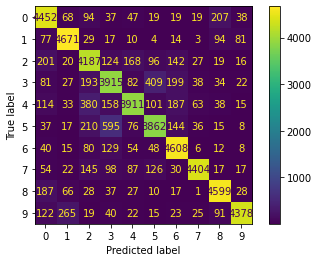

In [16]:
y_pred = np.argmax(model.predict(x=x_train), axis = 1)
matrix = ConfusionMatrixDisplay.from_predictions(np.argmax(y_train, axis = 1), y_pred)

#### Accuracy de validación

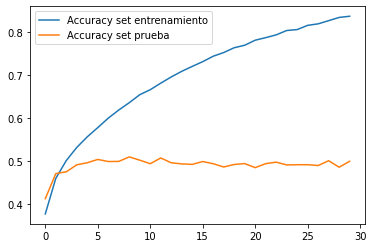

In [13]:
plt.plot(hist.history["accuracy"], label="Accuracy set entrenamiento")
plt.plot(hist.history["val_accuracy"], label="Accuracy set prueba")
plt.legend();